In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x) # virgülden sonra 2 basamak göster

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [178]:
df = pd.read_csv("datasets/advertising.csv")
df.head() # 1 bağımlı (sales) 3 bağımsız değişken var

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


yine biraz teorikten gidersek

In [179]:
X = df[["TV"]]
y = df[["sales"]]
# basit bir örnek için iki değişkeni atadık

# modeli kurmakda bukadar
reg_model = LinearRegression().fit(X, y)
# fit işlemi doğru eğimi ve kesişimi bulur yani model en iyi doğrusal ilişkiyi bulmak için veriyi işler ama tahmin yapmaz
# satış ile tv arasında matematik modelini ayarlıyor grafikte çizgiyi doğru yere koymaya yarıyor
# tahmin yapma işini predict metodu yapar


# y_hat = b + w*X  ---> bu bizim lineer regresyon formülümüzdü

# sabit (b - bias)
reg_model.intercept_[0] # dönen değerde b sabitimizin değeri yani scikit learn kütüphanesi için intercept_



np.float64(7.032593549127695)

In [180]:
# y_hat = b + w*TV ---> tv için
# tv'nin katsayısı (yani w1 yani ağırlık)
reg_model.coef_[0][0] # yine scikit learn kütüphanesi coeficiant olarak isimlendirmiş


np.float64(0.04753664043301975)

In [181]:
# şimdi bunları birleştirelim mesela 150 birimlik tv harcaması olsa ne kadar satış olması beklenir
reg_model.intercept_[0] + reg_model.coef_[0][0]*150 # --> b + w*TV yani
# çıktı cevabı verdi 14 birimlikmiş

np.float64(14.163089614080658)

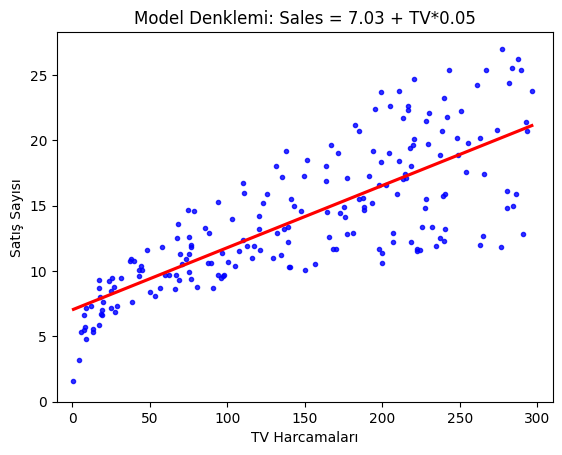

In [182]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


In [183]:
# şimdi olması gereken şekilde tüm değerleri tahmin edelim
y_predict = reg_model.predict(X) # X teki veriye bakarak(tv) yeni hedef tahminlerini yapıyor
# MSE ilede ortalama hata değerleri kareleri buluyorduk
mean_squared_error(y, y_predict) # tahmin edilen değerlerle gerçek değerlere bakıyoruz


10.512652915656757

In [184]:
# 10 birim çıktı kökü alırsak yani RMSE
np.sqrt(mean_squared_error(y, y_predict))
# 3.24

np.float64(3.2423221486546887)

In [185]:
y.mean()
# ve ortalama satış birimide 14 müş yani 3.24 çokta küçük bir hata payı değil

sales   14.02
dtype: float64

In [186]:
# veya MAE ile bakalım
mean_absolute_error(y, y_predict)
# buda 2.54
# dikkat eğer MSE kullanıldıysa optimize ettikten sonra yine MSE ile yeni değere bakılır
# veya MAE kullanıldıysa optimize sonraso yine MAE ye bakılır ne kadar düşmüş diye
# yani örnek MSE kullandıktan sonra başka bir hata metriğine bakma birinden yürü

2.549806038927486

In [187]:
# R-KARE: Lineer regresyonun başarı ölçütü
# Bağımsız değişkenin bağımlı değişken üzerindeki etkisini ölçer.
# Bağımlı değişkendeki değişkenliğin ne kadarını modelin açıkladığını gösterir.

# Örneğin: Satışlar (bağımlı değişken) TV reklam harcamalarından (bağımsız değişken) ne kadar etkileniyor?

# reg_model.score(X, y) → R² değerini verir.
# - 1'e ne kadar yakınsa, model o kadar başarılıdır.
# - 0 ise, model hiçbir açıklama yapamıyor demektir.
# - Negatifse, model ortalamadan bile kötü sonuç veriyor.

reg_model.score(X, y)

0.611875050850071

# ---------------------------------------------------------------------------------------------------
### Multiple Linear Regression
# ---------------------------------------------------------------------------------------------------


In [188]:
df = pd.read_csv("datasets/advertising.csv") # dataya bir refresh atalım

X = df.drop('sales', axis=1) # bağımlı değişkeni atıp x eksenine kaydediyoruz
y = df[["sales"]]

In [189]:
# modeli test ve eğitim olarak ikiye ayırdık bunun teoriğini geçiyorum
# burada X,y yerlşetirme sırası önemli ilk parametre bağımsız değişken sonra bağımlı değişken
# test setini verinin yüzde 20 si olarak ayarladımki genelde 80 e 20 veya 75 e 25 falan tercih edilir
# random state rastgele girdim verisetinden rastgele bölgeden train ve test oluşturacak tuarlılığı kontrol etmek için 21 sayısı değişir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)
# kaç satır train edildiği .shape ile gözükür


In [190]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
# burasıda modelin eğitimiydi

# sabit (b - bias)
reg_model.intercept_ # çıktı: 2.74

# coefficients (w - weights)
reg_model.coef_ # çıktı 0.046, 0.191, -0.001

# denklemi --> b + x1w1 + x2w2 + x3w3 = 2.74 + tv*0.046 + radio*0.191 - newspaper*(-0.001)
# bu değerler random state = 21 seçili bölge içindir

array([[ 0.04621061,  0.19146787, -0.00164059]])

# ------------------------------------------------------------------------------------
### Tahmin Başarısını Değerlendirme
# ------------------------------------------------------------------------------------

In [191]:
y_pred = reg_model.predict(X_train) # yine modeli tahminledik
np.sqrt(mean_squared_error(y_train, y_pred)) # 1.67 çıktı verdi yani mse hata oranı karekökü

np.float64(1.6736910446097832)

In [192]:
# ilişkiye bakalım r'2 ile
reg_model.score(X_train, y_train)
# %88 iyimiş yukarıdaki r'2 örneğine bakarsak oranımız %61 den yükseldi çünkü yeni değişkenler eklendikçe başarı artar hata düşer

0.8876272528162705

In [193]:
# Test RMSE
y_pred = reg_model.predict(X_test) # birde train değilde test modeli için bi bakış atalım
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.66 
# aynı şekilde test verisi içinde r'2 bakılabilir

np.float64(1.6611334844530619)

şimdiye kadar hold out yöntemiyle ilerledik şimdide cross validationa bakalım

In [194]:
# 10 Katlı CV RMSE hold out yerine tercih edilebilir ikisininde artı eksi yönleri var
np.mean(np.sqrt(- cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))
# 1.69 geldi
# gözlem sayımız bu verisetinde çok az olduğundan (200 satır) x,y train kullanmaktansa tüm değişkenleri aldım
# bunun sonucu negatif geleceği için birde - ile çarptım

np.float64(1.6913531708051797)

# bonus
### Simple Linear Regression with Gradient Descent from Scratch

In [195]:
# büyük resmi görmek için exstra içerik


# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w


# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


df = pd.read_csv("datasets/advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)


Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25

KeyboardInterrupt: 